Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
**************Total Spending Overview **************
Total Spent: ₹5400
Highest Expense: ₹5000 on Rent - June Rent
Lowest Expense: ₹50 on Transport - Rickshaw fare

********** Category-wise Analysis *********
           Total Spent  Transaction Count  Percentage (%)
Category                                                 
Food               150                  1            2.78
Rent              5000                  1           92.59
Transport           50                  1            0.93
Utilities          200                  1            3.70
*
*************TPie Chart **************


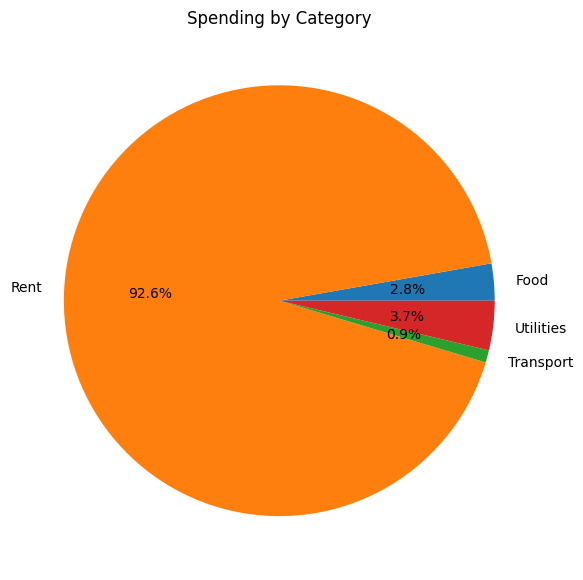


**************Total BAR Chart**************


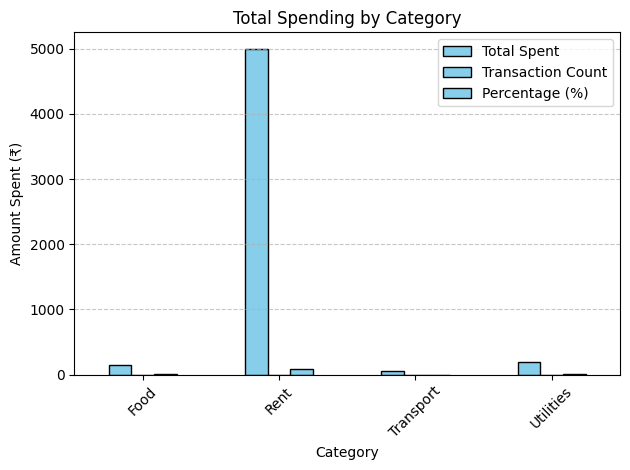

In [5]:
import pandas
import numpy
import matplotlib.pyplot as plot

from google.colab import drive
drive.mount('/content/drive')

# Load CSV into a dataframe
dataframe = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/expenses.csv')

# 1. Total Spending Overview
total_spent = numpy.sum(dataframe['Amount'])
max_expense = dataframe.loc[numpy.argmax(dataframe['Amount'])]
min_expense = dataframe.loc[numpy.argmin(dataframe['Amount'])]

print("**************Total Spending Overview **************")
print(f"Total Spent: ₹{total_spent}")
print(f"Highest Expense: ₹{max_expense['Amount']} on {max_expense['Category']} - {max_expense['Description']}")
print(f"Lowest Expense: ₹{min_expense['Amount']} on {min_expense['Category']} - {min_expense['Description']}")

# 2. Category-wise Analysis
category_group = dataframe.groupby('Category').agg({
    'Amount': ['sum', 'count']
})
category_group.columns = ['Total Spent', 'Transaction Count']
category_group['Percentage (%)'] = numpy.round((category_group['Total Spent'] / total_spent) * 100, 2)

print("\n********** Category-wise Analysis *********")
print(category_group)

# 3. Pie Chart
print("*\n*************TPie Chart **************")
category_group['Total Spent'].plot.pie(
    autopct='%1.1f%%', figsize=(6, 6), title="Spending by Category"
)
plot.ylabel('')
plot.tight_layout()
plot.show()


# 4. Bar Chart
print("\n**************Total BAR Chart**************")

category_group.plot(kind='bar', color='skyblue', edgecolor='black')
plot.title('Total Spending by Category')
plot.xlabel('Category')
plot.ylabel('Amount Spent (₹)')
plot.xticks(rotation=45)
plot.grid(axis='y', linestyle='--', alpha=0.7)
plot.tight_layout()
plot.show()



